In [1]:
import os
import random
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline
import random
%run Mahalanobis.ipynb
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv('rpm.csv')
data.columns = ['rpm', 'throotle']
data.head()

,rpm,throotle
0,805,0.0
1,799,0.0
2,803,0.0
3,800,0.0
4,801,0.0


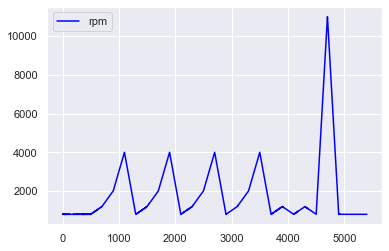

In [3]:
scaler = preprocessing.MinMaxScaler()

data_scaler = pd.DataFrame(scaler.fit_transform(data), columns=data.columns, index=data.index)

ax = plt.gca()
data.plot(kind='line',y='rpm',color='blue', ax=ax)
plt.show()

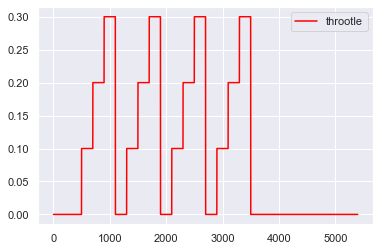

In [4]:
ax = plt.gca()
data.plot(kind='line',y='throotle',color='red', ax=ax)
plt.show()

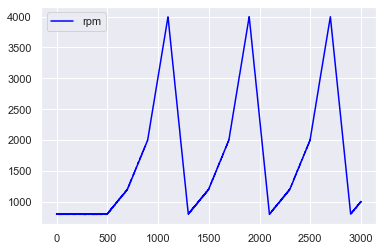

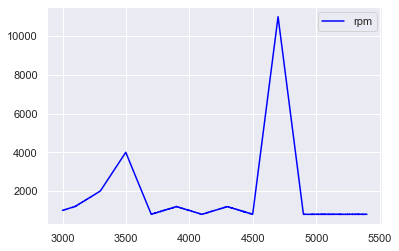

In [5]:
dataset_train = data[0:3000]
dataset_test = data[3000:]

ax = plt.gca()
dataset_train.plot(kind='line',y='rpm',color='blue', ax=ax)
plt.show()

ax = plt.gca()
dataset_test.plot(kind='line',y='rpm',color='blue', ax=ax)
plt.show()

In [6]:
X_train = pd.DataFrame(scaler.fit_transform(dataset_train), columns=dataset_train.columns, index=dataset_train.index)
X_train.sample(frac=1)
X_test = pd.DataFrame(scaler.transform(dataset_test), columns=dataset_test.columns, index=dataset_test.index)

(0.0, 15)

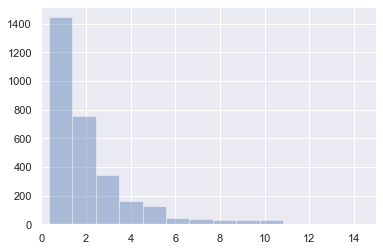

In [7]:
pca = PCA(n_components=2, svd_solver= 'full')
X_train_PCA = pca.fit_transform(X_train)
X_train_PCA = pd.DataFrame(X_train_PCA)
X_train_PCA.index = X_train.index
X_test_PCA = pca.transform(X_test)
X_test_PCA = pd.DataFrame(X_test_PCA)
X_test_PCA.index = X_test.index



data_train = np.array(X_train_PCA.values)
data_test = np.array(X_test_PCA.values)

cov_matrix, inv_cov_matrix  = cov_matrix(data_train)

mean_distr = data_train.mean(axis=0)
dist_test = MahalanobisDist(inv_cov_matrix, mean_distr, data_test, verbose=False)
dist_train = MahalanobisDist(inv_cov_matrix, mean_distr, data_train, verbose=False)
threshold = MD_threshold(dist_train, extreme = True)


plt.figure()
sns.distplot(np.square(dist_train),
             bins = 10, 
             kde= False);
plt.xlim([0.0,15])

Text(0.5, 0, 'Mahalanobis dist')

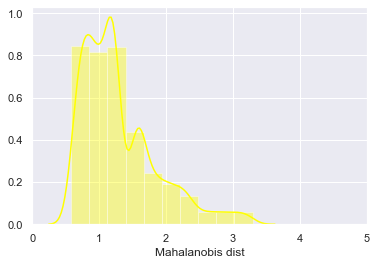

In [8]:
plt.figure()
sns.distplot(dist_train,
             bins = 10, 
             kde= True, 
            color = 'yellow');
plt.xlim([0.0,5])
plt.xlabel('Mahalanobis dist')

In [9]:
anomaly_train = pd.DataFrame()
anomaly_train['Mob dist']= dist_train
anomaly_train['Thresh'] = threshold
# If Mob dist above threshold: Flag as anomaly
anomaly_train['Anomaly'] = anomaly_train['Mob dist'] > anomaly_train['Thresh']
anomaly_train.index = X_train_PCA.index
anomaly = pd.DataFrame()
anomaly['Mob dist']= dist_test
anomaly['Thresh'] = threshold
# If Mob dist above threshold: Flag as anomaly
anomaly['Anomaly'] = anomaly['Mob dist'] > anomaly['Thresh']
anomaly.index = X_test_PCA.index
anomaly.head()

,Mob dist,Thresh,Anomaly
3000,0.805440,3.88924,False
3001,0.804322,3.88924,False
3002,0.802088,3.88924,False
3003,0.799854,3.88924,False
3004,0.789808,3.88924,False


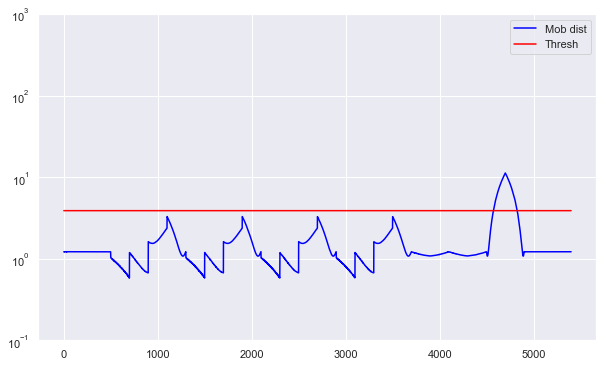

In [11]:
anomaly_alldata = pd.concat([anomaly_train, anomaly])
anomaly_alldata.plot(logy=True, figsize = (10,6), ylim = [1e-1,1e3], color = ['blue','red'])